In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astroquery.vizier import Vizier
from astropy.io import fits
from matplotlib.colors import LogNorm
from astropy import wcs

# Your base directory here
base_dir = '/Users/esola/Documents/Postdoc/Lectures/DIS_MPhil_2025/notebook/'

# <a  anchor='#chapter1'> -*-*-*-*- I. Catalogues -*-*-*-*- </a>

## <a  anchor='section1_1'> I.1) Direct download of online tables </a>


In [2]:
# Either you found the table somewhere already...

# Or you can use services such as Vizier to access published catalogues

catalogue_name = 'J/MNRAS/506/5494' # Poulain+2021 MATLAS dwarfs structure and morphology
# https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/MNRAS/506/5494&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa
# Download with 'Unlimited' rows the catalogue as VOTable file (and rename it as poulain21.vot)


In [3]:
## Read the downloaded table
catalogue_path = base_dir + 'poulain21.vot'
catalogue      = Table.read(catalogue_path, format = 'votable', table_id = 0)
catalogue

_RAJ2000,_DEJ2000,recno,prop,ID,HostETG,Dist,f_Dist,Distl,r_Distl,RAJ2000,DEJ2000,gmag,g-i,g-r,n,n_n,Re,b_a,PA,mu0g,__mueg_,Morph,Simbad
deg,deg,,,,,Mpc,,Mpc,,deg,deg,mag,mag,mag,,,arcsec,,deg,mag / arcsec2,mag / arcsec2,,
float64,float64,int32,str1,str11,str9,float32,uint8,float32,str1,float64,float64,float32,float32,float32,float32,str1,float32,float32,float32,float32,float32,str4,str6
18.299800,-2.079200,1,,MATLAS-1,NGC0448,29.5,1,--,,18.2998,-2.0792,--,--,--,--,,--,--,--,--,--,dI,Simbad
18.323600,-1.170800,2,,MATLAS-2,NGC0448,29.5,1,--,,18.3236,-1.1708,19.90,0.71,--,1.21,,3.81,0.45,1.35,23.26,24.05,dE,Simbad
18.339600,-1.823100,3,,MATLAS-3,NGC0448,29.5,1,--,,18.3396,-1.8231,20.44,--,--,0.61,*,4.54,0.52,85.42,24.18,24.96,dI,Simbad
18.419800,-1.916900,4,,MATLAS-4,NGC0448,29.5,1,--,,18.4198,-1.9169,--,--,--,--,,--,--,--,--,--,dI,Simbad
18.677800,-1.097200,5,,MATLAS-5,NGC0448,29.5,1,--,,18.6778,-1.0972,20.55,0.72,0.50,1.33,,3.52,0.75,38.52,23.74,24.52,dE,Simbad
18.687500,-1.241500,6,,MATLAS-6,NGC0448,29.5,1,--,,18.6875,-1.2415,19.95,0.58,--,0.69,,3.88,0.75,46.88,23.35,24.14,dE,Simbad
18.719300,-1.095300,7,,MATLAS-7,NGC0448,29.5,1,28.96,a,18.7193,-1.0953,--,--,--,--,,--,--,--,--,--,dE,Simbad
18.756700,-1.480600,8,*,MATLAS-8,NGC0448,29.5,1,--,,18.7567,-1.4806,19.63,1.26,0.75,0.57,,8.75,0.78,48.37,24.79,25.58,dEN,Simbad


## <a  anchor='section1_2'> I.2) Access with the astroquery module </a>


In [4]:
catalogue_name = 'J/MNRAS/506/5494' # Poulain+2021 MATLAS dwarfs structure and morphology
catalogue      = Vizier.get_catalogs(catalogue_name) 
print(catalogue)

TableList with 2 tables:
	'0:J/MNRAS/506/5494/table1' with 21 column(s) and 50 row(s) 
	'1:J/MNRAS/506/5494/table4' with 10 column(s) and 50 row(s) 


In [5]:
## By default, Vizier only queries the 50 first rows. To retrieve all the rows in a query, set ROW_LIMIT to -1
Vizier.ROW_LIMIT = -1
catalogue = Vizier.get_catalogs(catalogue_name) 
print(catalogue)


TableList with 2 tables:
	'0:J/MNRAS/506/5494/table1' with 21 column(s) and 2210 row(s) 
	'1:J/MNRAS/506/5494/table4' with 10 column(s) and 524 row(s) 


In [6]:
## Access the 1st table
table1 = catalogue[0]
table1

prop,ID,HostETG,Dist,f_Dist,Distl,r_Distl,RAJ2000,DEJ2000,gmag,g-i,g-r,n,n_n,Re,b/a,PA,mu0g,<mueg>,Morph,Simbad
,,,Mpc,,Mpc,,deg,deg,mag,mag,mag,,,arcsec,,deg,mag / arcsec2,mag / arcsec2,,
str1,str11,str9,float32,uint8,float32,str1,float64,float64,float32,float32,float32,float32,str1,float32,float32,float32,float32,float32,str4,str6
,MATLAS-1,NGC0448,29.5,1,--,,18.2998,-2.0792,--,--,--,--,,--,--,--,--,--,dI,Simbad
,MATLAS-2,NGC0448,29.5,1,--,,18.3236,-1.1708,19.90,0.71,--,1.21,,3.81,0.45,1.35,23.26,24.05,dE,Simbad
,MATLAS-3,NGC0448,29.5,1,--,,18.3396,-1.8231,20.44,--,--,0.61,*,4.54,0.52,85.42,24.18,24.96,dI,Simbad
,MATLAS-4,NGC0448,29.5,1,--,,18.4198,-1.9169,--,--,--,--,,--,--,--,--,--,dI,Simbad
,MATLAS-5,NGC0448,29.5,1,--,,18.6778,-1.0972,20.55,0.72,0.50,1.33,,3.52,0.75,38.52,23.74,24.52,dE,Simbad
,MATLAS-6,NGC0448,29.5,1,--,,18.6875,-1.2415,19.95,0.58,--,0.69,,3.88,0.75,46.88,23.35,24.14,dE,Simbad
,MATLAS-7,NGC0448,29.5,1,28.96,a,18.7193,-1.0953,--,--,--,--,,--,--,--,--,--,dE,Simbad
*,MATLAS-8,NGC0448,29.5,1,--,,18.7567,-1.4806,19.63,1.26,0.75,0.57,,8.75,0.78,48.37,24.79,25.58,dEN,Simbad


In [7]:
## List the columns names
print(table1.colnames) # Similar to print(table1.keys())

['prop', 'ID', 'HostETG', 'Dist', 'f_Dist', 'Distl', 'r_Distl', 'RAJ2000', 'DEJ2000', 'gmag', 'g-i', 'g-r', 'n', 'n_n', 'Re', 'b/a', 'PA', 'mu0g', '<mueg>', 'Morph', 'Simbad']


In [8]:
## Quick statistics of the dwarf morphologies
# dE: dwarf elliptical
# dI: dwarf irregular
# dEN: dwarf elliptical nucleated
# dIN: dwarf irregular nucleated
dE  = table1[np.where(table1['Morph']=='dE')]
dI  = table1[np.where(table1['Morph']=='dI')]
dEN = table1[np.where(table1['Morph']=='dEN')]
dIN = table1[np.where(table1['Morph']=='dIN')]

print('Total number of dwarfs', len(table1))
print('Total number of dE', len(dE), 'of dI', len(dI), 'of dEN', len(dEN), 'of dIN', len(dIN))
if (len(dE) + len(dI) + len(dEN) + len(dIN)) != len(table1):
    print(len(table1) -(len(dE) + len(dI) + len(dEN) + len(dIN)), 'dwarfs do not have a dE,dI,dEN or dIN morphology ')

Total number of dwarfs 2210
Total number of dE 1179 of dI 522 of dEN 453 of dIN 54
2 dwarfs do not have a dE,dI,dEN or dIN morphology 


In [9]:
## Identify these dwarfs that do not have dE,dI,dEN or dIN morphology
nomorph = table1[np.where((table1['Morph']!='dE') & (table1['Morph']!='dI') & (table1['Morph']!='dEN') & (table1['Morph']!='dIN'))]
print(nomorph)

# Other way of quickly checking the different values of a column
print('Possible morphologies are',set(table1['Morph']))

# > Look at the paper to understand what this means
#dE∗ corresponds to the dwarf whose nucleus matches with a star in the Gaia DR2 catalogue.
#dE∗∗ corresponds to the dwarf for which one of the central bright GCs is possibly an NSC (Forbes et al. 2019)

prop      ID     HostETG Dist ...      mu0g         <mueg>    Morph Simbad
                         Mpc  ... mag / arcsec2 mag / arcsec2             
---- ----------- ------- ---- ... ------------- ------------- ----- ------
     MATLAS-2019 NGC5845 25.2 ...         24.42         25.21  dE** Simbad
     MATLAS-2179 NGC7465 29.3 ...         24.29         25.08   dE* Simbad
Possible morphologies are {np.str_('dIN'), np.str_('dI'), np.str_('dE'), np.str_('dEN'), np.str_('dE*'), np.str_('dE**')}


## <a  anchor='section1_3'> I.3) Examples of plots </a>


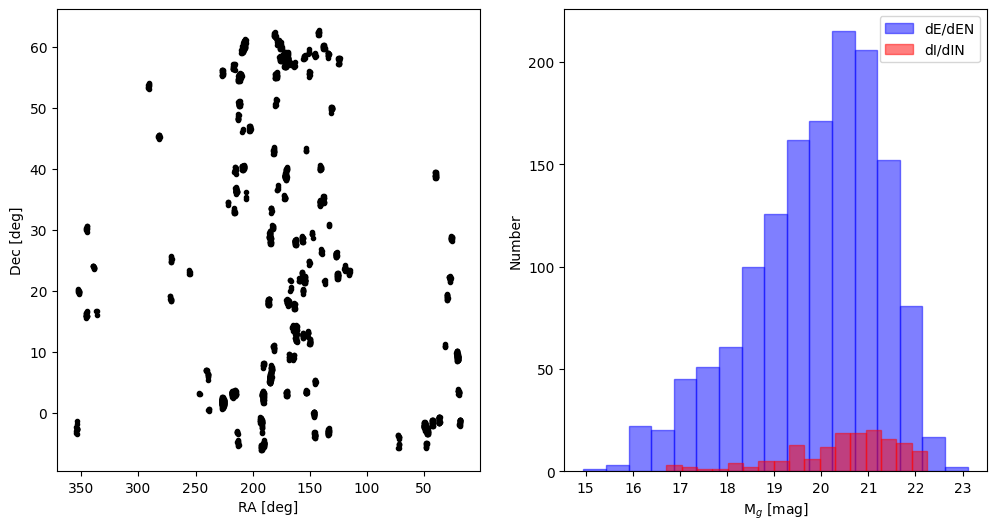

In [10]:
# Plot the positions of the dwarfs in RA,DEC
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(table1['RAJ2000'], table1['DEJ2000'], color='k', marker='.')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
# Convention: RA increases to the left
plt.gca().invert_xaxis()

plt.subplot(1,2,2)
all_dE = table1[np.where((table1['Morph']=='dE') | (table1['Morph']=='dEN'))]
all_dI = table1[np.where((table1['Morph']=='dI') | (table1['Morph']=='dIN'))]

plt.hist(all_dE['gmag'], bins=17, color='b', edgecolor='b', label='dE/dEN', alpha=0.5)
plt.hist(all_dI['gmag'], bins=17, color='r', edgecolor='r',label='dI/dIN', alpha=0.5)
plt.xlabel('M$_{g}$ [mag]')
plt.ylabel('Number')
plt.legend()

## <a  anchor='section1_4'> I.4) Manipulate tables with Topcat </a>


#### Open the catalogue, double-click on it on the left panel to open the table

<img src="notebook/images/topcat_table.png" width="1600">


### Select the subset of galaxies that are dE/dEN and dI/dIN
Go to Subset > click on the green + and add the expression (beware of the syntax for str)

<img src="notebook/images/topcat_subset.png" width="800">


Create the histogram of the gmag distribution: 
- Click on the histogram button 
- In the bottom panel select 'Subset' and select dE/dEN and dI/dIN
- Adjust the axes title and the label

<img src="notebook/images/topcat_histogram.png" width="1100">


Plot the RA,Dec position of the sources:
- Click on the 'Sky plotting window' icon (the celestial grid)
- Select RA,Dec columns
- Do it for all sources, then separating dE/dEN from dI/dIN

<img src="notebook/images/topcat_scatter.png" width="800">


# <a  anchor='chapter2'> -*-*-*-*- II. Manipulate FITS files -*-*-*-*- </a>


## <a  anchor='section2_1'> II.1) FITS and astropy </a>


In [11]:
fits_path = base_dir + 'matlas_ngc3230.fits' # 'UGC01245_r.fits'
# Opens the fits file: Header-Data Unit (HDU) contains the header and the image
with fits.open(fits_path) as hdu:
    header = hdu[0].header
    data   = hdu[0].data
    
## Other method to open fits (be careful, less memory efficient)
#header = fits.getheader(fits_path)
#data   = fits.getdata(fits_path)

#header

(3000, 3000)


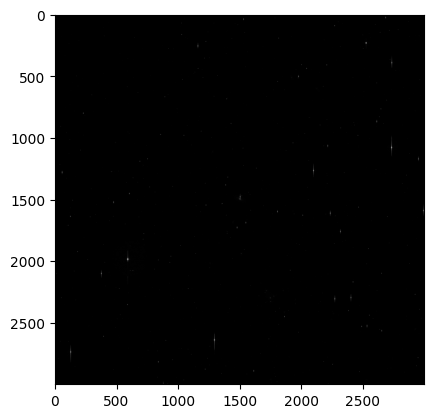

In [12]:
# Size of the image
print(data.shape)
# Show the image
plt.imshow(data, cmap='gray')
# What is wrong with it ?

Text(0, 0.5, 'Y [pix]')

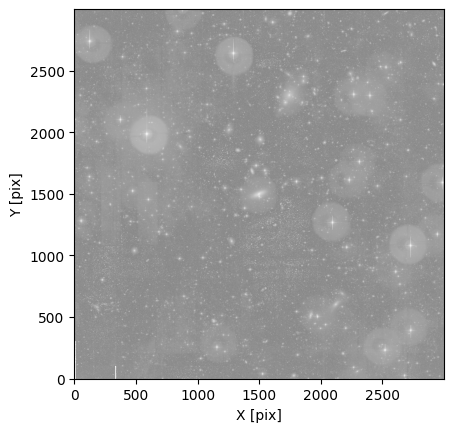

In [13]:
## Adjust the scaling
plt.imshow(data, origin='lower', norm=LogNorm(), cmap='gray')
plt.xlabel('X [pix]')
plt.ylabel('Y [pix]')

## <a  anchor='section2_2'> II.2) Overplot objects' positions on an image </a>


You have a catalogue of coordinates (RA,DEC) of sources and a fits image. You will plot the position of the sources on that image

Number of sources in the catalogue 18


_RAJ2000,_DEJ2000,recno,prop,ID,HostETG,Dist,f_Dist,Distl,r_Distl,RAJ2000,DEJ2000,gmag,g-i,g-r,n,n_n,Re,b/a,PA,mu0g,<mueg>,Morph,Simbad
float64,float64,int64,str1,str10,str7,float64,int64,str5,str1,float64,float64,str5,str1,str4,str4,str1,str4,str4,str6,str5,str5,str3,str6
155.5875,12.9975,682,,MATLAS-682,NGC3230,40.8,1,,,155.5875,12.9975,21.04,,0.33,0.78,,5.69,0.50,-55.78,25.34,26.13,dI,Simbad
155.6414,13.0051,683,,MATLAS-683,NGC3230,40.8,1,,,155.6414,13.0051,21.82,,,0.40,,3.58,0.60,-20.48,25.05,25.84,dE,Simbad
155.662,12.8705,684,,MATLAS-684,NGC3230,40.8,1,,,155.662,12.8705,,,,,,,,,,,dE,Simbad
155.715,12.991,687,,MATLAS-687,NGC3230,40.8,1,,,155.715,12.991,,,,,,,,,,,dI,Simbad
155.7432,12.8991,689,*,MATLAS-689,NGC3230,40.8,1,,,155.7432,12.8991,19.47,,0.60,1.19,,3.76,0.93,-42.44,22.81,23.59,dEN,Simbad
155.7871,12.9339,690,,MATLAS-690,NGC3230,40.8,1,,,155.7871,12.9339,20.44,,0.37,0.89,,4.38,0.59,-4.45,23.76,24.54,dI,Simbad
155.8596,12.5952,692,*,MATLAS-692,NGC3230,40.8,1,38.11,a,155.8596,12.5952,17.73,,0.57,1.30,,5.94,0.73,-53.44,22.06,22.84,dEN,Simbad
155.8712,12.7229,694,,MATLAS-694,NGC3230,40.8,1,,,155.8712,12.7229,21.05,,0.54,0.93,,5.41,0.81,-50.14,25.18,25.96,dE,Simbad
155.8892,12.8971,695,,MATLAS-695,NGC3230,40.8,1,,,155.8892,12.8971,21.15,,0.38,1.04,,3.73,0.76,-30.69,24.47,25.25,dE,Simbad


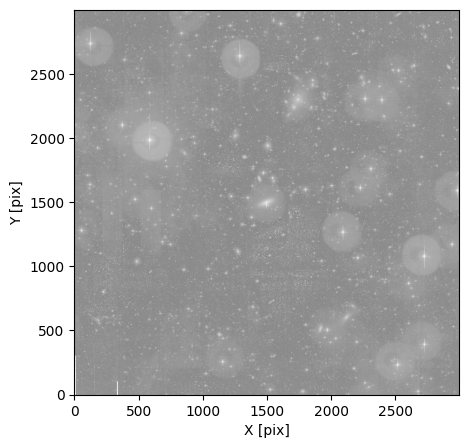

In [14]:
# Opens the FITS image
fits_path = base_dir + 'matlas_ngc3230.fits'
with fits.open(fits_path) as hdu:    
    header = hdu[0].header
    data   = hdu[0].data
    
plt.figure(figsize=(5,5))
plt.imshow(data, origin='lower', cmap='gray', norm=LogNorm())
plt.xlabel('X [pix]')
plt.ylabel('Y [pix]')


# Opens the catalogue
catalogue = Table.read(base_dir + 'matlas_dwarfs_on_ngc3230.txt', format='ascii')
print('Number of sources in the catalogue',len(catalogue))
catalogue
# Initialises a WCS (World Coordinate System) instance with the astronomical calibration of the header

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 155.93315387693 12.56775382058 
CRPIX : 1500.0 1500.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00033334179518608 0.00033334179518609 
NAXIS : 3000  3000


Text(0, 0.5, 'Y [pix]')

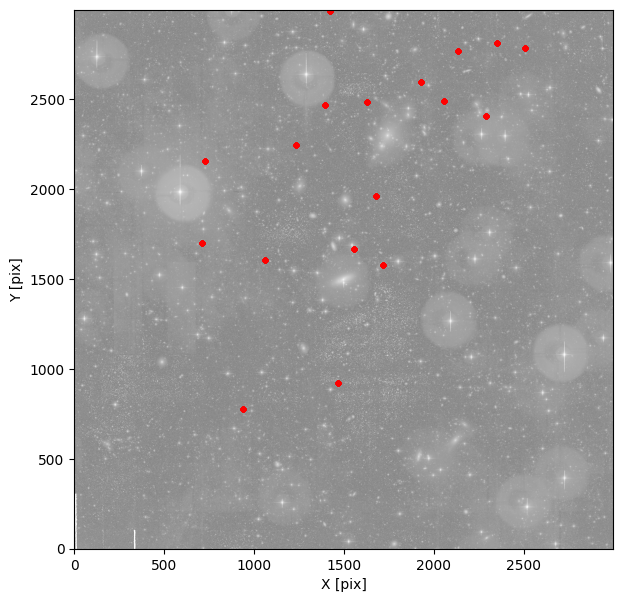

In [17]:
### To go from the RA,DEC coordinates of the objects to the X,Y pixels in the image above, you need to use the WCS (World Coordinate System)

# Initialise a WCS instance
my_wcs = wcs.WCS(header)
# Examine what the WCS looks like 
print(my_wcs)

# Now that we have the WCS transform element, we can go from (RA,DEC) to (X,Y)
ra  = list(catalogue['RAJ2000'])
dec = list(catalogue['DEJ2000'])
x,y = my_wcs.world_to_pixel_values(ra,dec)

# Iterates through the list of (X,Y) coordinates and overplot them on the image
plt.figure(figsize=(7,7))
plt.imshow(data, origin='lower', cmap='gray', norm=LogNorm())
for i in range(len(x)):
    plt.scatter(x,y, marker='.', color='r')
plt.xlabel('X [pix]')
plt.ylabel('Y [pix]')

#### Quick check that the positions are correct with Aladin 

<img src="notebook/images/matlas_dwarfs_on_ngc3230.png" width="600">



## <a  anchor='section2_3'> II.3) FITS and DS9 </a>


- Click on File > Open and select the file
- Click on File > Header to display the header
- Change the scaling of the image with scale > histogram (try some others)

<img src="notebook/images/fits_header.png" width="1200">


# <a  anchor='chapter3'> -*-*-*-*- III. Aladin -*-*-*-*- </a>


### Goal: 
1) Load a set of publicly available images in Aladin. You will use MATLAS color images
2) Load a catalogue of galaxies. Here you wil
3) Find which galaxies are located in the images you have. Export the resulting table and open it with Python

## <a  anchor='section3_1'> III.1) Load survey images </a>


- In the bottom left panel, write MATLAS in the selection box.
- Then select just above from Collections >  Images > Optical > MATLAS > MATLAS_color


<img src="notebook/images/matlas_load.png" width="800">

## <a  anchor='section3_2'> III.2) Load a catalogue </a>


- In the bottom left panel, write ATLAS3D
- Select just above from Collections > Catalog > Vizier > Journal Table > MNRAS > the ATLAS3D project I (Cappellari+2011)
- Check that the catalogue contains 871 sources (hover your mouse on the catalogue name and look for the number of rows)

<img src="notebook/images/atlas3d_load.png" width="800">

You should have two layers loaded on the right-side of the window: the image layer and the catalogue (red triangles)

<img src="notebook/images/matlas_atlas3d.png" width="800">

And if you zoom out and display the coordinate grid

<img src="notebook/images/matlas_atlas3d_zoom_out.png" width="800">



## <a  anchor='section3_3'> III.3) Create the MOC (Multi-Order Coverage map) of the images </a>


- Make sure you selected the MATLAS image layer on the bottom right panel
- Go to Coverage > Load MOC for current survey
- The newly created MOC appears as another image layer

<img src="notebook/images/moc.png" width="800">


## <a  anchor='section3_4'> III.4) Intersection between MOC and catalogue </a>


- Go to Coverage > Filter a table by MOC
- Correctly select the MOC and catalogue layers
- A new catalogue resulting from the intersection between the MOC and the original catalogue is created (it appears on the bottom right panel)
- Export this new catalogue by File > Export layers (FITS, VOTable) and select the layer to export + its output format


### Now, load this catalogue with python and inspect its content

In [18]:
intersection_cat = Table.read(base_dir + 'atlas3d_on_moc_matlas.xml', format='votable')
intersection_cat

_RAJ2000,_DEJ2000,recno,T,Gal,RAJ2000,DEJ2000,SBF,NED-D,Virgo,Vhel,Dist,KMAG,AB,T-type,log(Re),SimbadName,NED,LEDA
deg,deg,,,,deg,deg,,,,km / s,Mpc,mag,mag,,log(arcsec),,,
float64,float64,int32,str1,str10,float64,float64,uint8,int16,uint8,int16,float32,float32,float32,float32,float32,str9,str3,str4
146.47265611,-0.26822111,1,E,IC0560,146.472656,-0.268221,0,0,0,1853,27.2,-22.10,0.59,-0.7,1.11,IC0560,NED,LEDA
153.20242306,43.14554611,2,E,IC0598,153.202423,43.145546,0,0,0,2256,35.3,-22.60,0.06,-0.1,1.02,IC0598,NED,LEDA
168.16590889,9.05573611,3,E,IC0676,168.165909,9.055736,0,0,0,1429,24.6,-22.27,0.11,-1.3,1.35,IC0676,NED,LEDA
185.40405306,5.76567194,5,E,IC0782,185.404053,5.765672,0,0,0,2424,36.3,-22.02,0.09,2.7,1.35,IC0782,NED,LEDA
217.86341889,3.00910694,6,E,IC1024,217.863419,3.009107,0,0,0,1479,24.2,-21.85,0.13,-2.0,1.05,IC1024,NED,LEDA
18.81887611,-1.62610500,8,E,NGC0448,18.818876,-1.626105,1,1,0,1908,29.5,-23.02,0.26,-2.5,1.05,NGC0448,NED,LEDA
20.02790111,3.41527000,9,E,NGC0474,20.027901,3.415270,0,1,0,2315,30.9,-23.91,0.15,-2.0,1.52,NGC0474,NED,LEDA
20.73141500,9.04916889,10,E,NGC0502,20.731415,9.049169,0,0,0,2524,35.9,-23.05,0.17,-2.0,1.07,NGC0502,NED,LEDA


# <a  anchor='chapter4'> -*-*-*-*- IV. Exploration of Euclid data -*-*-*-*- </a>


Goals with Aladin:
- Load the Euclid ERO images
- Search for the Perseus cluster
- Create the MOC of the ERO images 
- Overlay the Simbad catalogue in the current MOC
- Export the catalogue

<img src="notebook/images/ero_perseus.png" width="1700">

Visually compare Euclid ERO in VIS band to other surveys in the same view (make sure to click on the small button 'Unif.' at the very bottom of the view)

<img src="notebook/images/euclid_ero_vs_other.png" width="1700">


#### Note: Aladin Lite is a lightweight version of Aladin with few options, but you can still do quite a lot quickly !

<img src="notebook/images/aladin_lite.png" width="1600">

# <a  anchor='chapter5'> -*-*-*-*- V. Exploration of DESI Legacy Imaging Surveys data -*-*-*-*- </a>


## Accessible at: https://www.legacysurvey.org/viewer 

Goals:
- Query some objects you want to see
- Navigate in the images
- Change the constrat/brightness of the images
- Try out the different overlay layers

<img src="notebook/images/desi_ls.png" width="1600">